Raw X shape: (757, 200, 3)
Labels: ['normal' 'udrykning']
✔ Vinduer og kanaler OK!
✔ Data normaliseret!
Train: (605, 200, 3)
Test : (152, 200, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 200, 32)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 32)        │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 100, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 50, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,721 (104.38 KB)

 Trainable params: 26,529 (103.63 KB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7554 - loss: 0.5338 - val_accuracy: 0.5526 - val_loss: 0.6799
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8083 - loss: 0.3992 - val_accuracy: 0.6184 - val_loss: 0.6601
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8579 - loss: 0.3329 - val_accuracy: 0.5855 - val_loss: 0.6574
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9058 - loss: 0.2517 - val_accuracy: 0.6776 - val_loss: 0.6337
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9074 - loss: 0.2245 - val_accuracy: 0.7039 - val_loss: 0.6077
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9405 - loss: 0.1795 - val_accuracy: 0.7368 - val_loss: 0.5955
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9405 - loss: 0.1640 - val_accuracy: 0.6842 - val_loss: 0.5911
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9405 - loss: 0.1429 - val_accuracy: 0.750

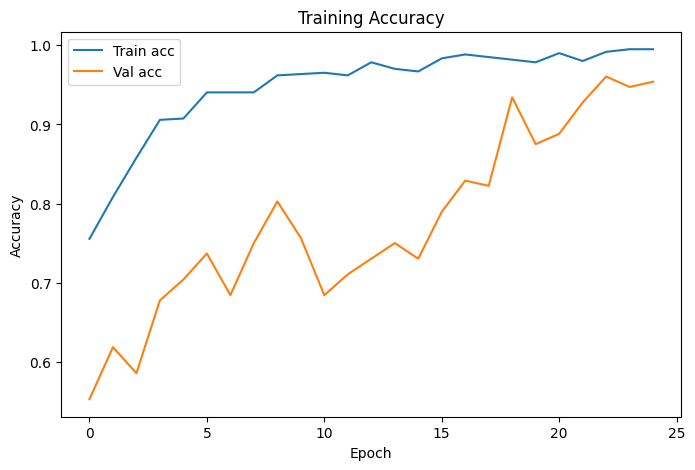

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 


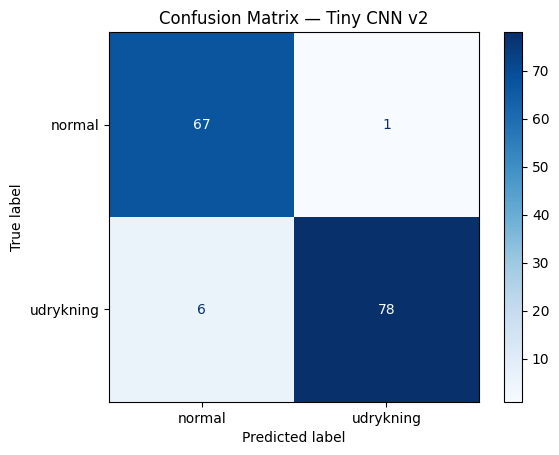

In [1]:
# ============================================================
# TINY CNN v2 — forbedret model til accelerometer klassifikation
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models

# ------------------------------------------------------------
# STEP 1 — Load data
# ------------------------------------------------------------
X = np.load("X_windows.npy")   # shape: (N, window, 3)
y = np.load("y_labels.npy")

print("Raw X shape:", X.shape)
print("Labels:", np.unique(y))

# Label encode
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ------------------------------------------------------------
# STEP 2 — Validate shapes
# ------------------------------------------------------------
assert len(X.shape) == 3, "X skal være 3D: (samples, window, channels)"
assert X.shape[1] == 200, f"Vindueslængde skal være 200 samples, men er {X.shape[1]}"
assert X.shape[2] == 3, f"Der skal være 3 kanaler (x,y,z), men der er {X.shape[2]}"
print("✔ Vinduer og kanaler OK!")

# ------------------------------------------------------------
# STEP 3 — Normalize data
# ------------------------------------------------------------
X = X.astype(np.float32)
X_mean = X.mean(axis=(0,1), keepdims=True)
X_std  = X.std(axis=(0,1), keepdims=True)
X = (X - X_mean) / (X_std + 1e-8)

print("✔ Data normaliseret!")

# ------------------------------------------------------------
# STEP 4 — Train/test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)

# ------------------------------------------------------------
# STEP 5 — Improved Tiny 1D-CNN (MCU friendly)
# ------------------------------------------------------------
model = models.Sequential([
    layers.Input(shape=(200, 3)),

    layers.Conv1D(32, 5, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(32, 5, strides=2, padding='same', activation='relu'),  # downsample

    layers.Conv1D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, 3, strides=2, padding='same', activation='relu'),

    layers.GlobalAveragePooling1D(),

    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

# ------------------------------------------------------------
# STEP 6 — Train
# ------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=32,
    verbose=1
)

# ------------------------------------------------------------
# STEP 7 — Evaluate
# ------------------------------------------------------------
loss, acc = model.evaluate(X_test, y_test)
print("\nTEST ACCURACY:", acc)

# Plot curves
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label="Train acc")
plt.plot(history.history['val_accuracy'], label="Val acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ------------------------------------------------------------
# STEP 8 — Confusion matrix
# ------------------------------------------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=le.classes_,
    cmap="Blues"
)
plt.title("Confusion Matrix — Tiny CNN v2")
plt.show()